#  In-class Labexercise
## Case-study 1 ( KNN)

### 1.1 Load the libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 1.2 Read the dataset(PlayTennis.csv):

In [2]:
data=pd.read_csv("G:\Datasets\PlayTennis\PlayTennis.csv")
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


### 1.3 Use the  LabelEncoder(Concerting categarical to Numarical data)

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Outlook=le.fit_transform(data.Outlook)

In [4]:
data.Temperature=le.fit_transform(data.Temperature)

In [5]:
data.Humidity=le.fit_transform(data.Humidity)
data.Wind=le.fit_transform(data.Wind)
data["Play Tennis"]=le.fit_transform(data["Play Tennis"])

In [6]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


### 1.4 Extract the independent variable X and dependent variable Y?

In [7]:
x=data.drop("Play Tennis",axis=1)
y=data["Play Tennis"]

### 1.5 Visualize the data:(countplot)

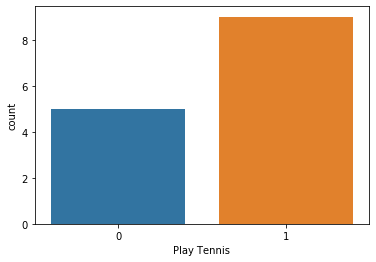

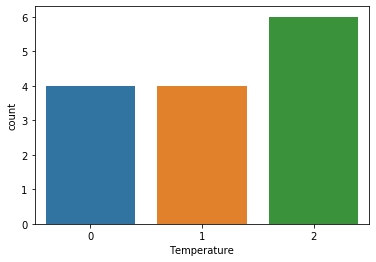

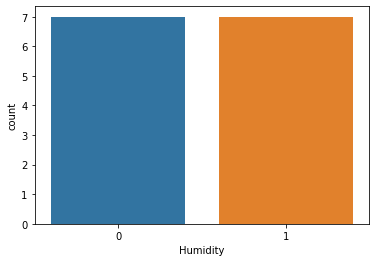

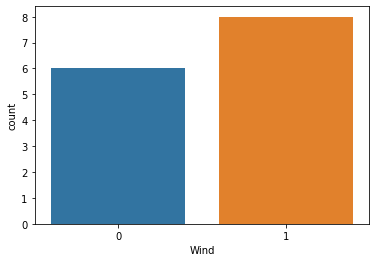

In [8]:
sns.countplot(y)
plt.show()
sns.countplot(x.Temperature)
plt.show()
sns.countplot(x.Humidity)
plt.show()
sns.countplot(x.Wind)














### 1.6 Split the data into train and test set:(70/30)

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)



In [10]:
ytrain.head()

8     1
2     1
1     0
13    0
4     1
Name: Play Tennis, dtype: int32

### 1.7 Train a knn

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### 1.8 Predict the model:

In [12]:
ypred=knn.predict(xtest)

### 1.9 Evaluation the model:(classification_report)

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print (classification_report(ytest, ypred))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred) * 100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

   micro avg       0.60      0.60      0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5

Accuracy: 60.00 %


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
from sklearn.model_selection import GridSearchCV
l=[]
for i in range(1,5):
    l.append(i)
param_dist = {"n_neighbors": l, "p":[1,2,3]}
cv_rf = GridSearchCV(knn, cv = 3,param_grid=param_dist)
cv_rf.fit(xtrain, np.ravel(ytrain))
print(cv_rf.best_params_)


{'n_neighbors': 3, 'p': 1}


In [15]:
knn= KNeighborsClassifier(n_neighbors=3,p= 1)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='uniform')

In [16]:
ypred1=knn.predict(xtest)

In [17]:
print (classification_report(ytest, ypred1))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred1) * 100))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

   micro avg       0.80      0.80      0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

Accuracy: 80.00 %


# Case-study 2  (NB)

### 2.1 Importing the dataset(pima-indians-diabetes.data)

In [18]:
data1=pd.read_csv("G:\Datasets\PlayTennis\pima.data",header=None)
data1.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.2 Find out the feature columns

### 2.3 Extract the independent variable X and dependent variable Y?

In [19]:
x=data1.drop(8,axis=1)

In [20]:
y=data1[8]

In [21]:
x.head()

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: 8, dtype: int64

### 2.4 Split the data into train and test set:(70/30)

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=2)

### 2.5 Train a GaussianNB?

In [24]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

### 2.6 Predict the model:

In [25]:
ypred2=gb.predict(xtest)

### 2.7 Evaluation the model:(classification_report)

In [26]:
print (classification_report(ytest, ypred2))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred2) * 100))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       155
           1       0.69      0.55      0.61        76

   micro avg       0.77      0.77      0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231

Accuracy: 77.06 %


### 2.8 Conclusion:



## Accuracy: 77.06 %


### 2.9 Confusion matrix

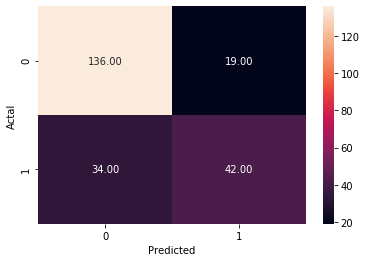

In [27]:
# this produces a 2x2 numpy array (matrix)
sns.heatmap(confusion_matrix(ytest, ypred2), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

### 2.10 what is Basic terminology For Confusion matrix?

True Positives (TP): 

True Negatives (TN):

False Positives (FP): 

* Falsely predict positive

Type I error

False Negatives (FN): 


* Falsely predict negative

Type II error

0: negative class

1: positive class

### 2.11 print the first 25 true and predicted responses

### 2.12 save confusion matrix and slice into four pieces

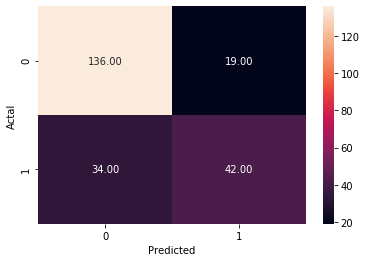

In [116]:
# this produces a 2x2 numpy array (matrix)
sns.heatmap(confusion_matrix(ytest, ypred2), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

### 2.13 Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

Sensitivity: When the actual value is positive, how often is the prediction correct?



Specificity: When the actual value is negative, how often is the prediction correct?



False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

### 2.14 Adjusting the classification threshold?

#### print the first 10 predicted responses?

#### print the first 10 predicted probabilities of class membership

#### print the first 10 predicted probabilities for class 1

#### store the predicted probabilities for class 1

#### plot histogram of predicted probabilities

#### create 8 bins

### print the first 10 predicted probabilities

### create new confusion matrix 

### 2.14 Receiver Operating Characteristic (ROC) Curves

#### define a function that accepts a threshold and prints sensitivity and specificity

# 3. What is advantages Confusion matrix and ROC/AUC?

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(xtrain)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
ypred9=kmeans.predict(xtest)

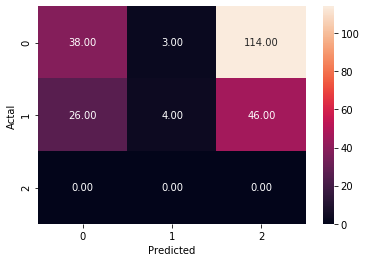

In [38]:
sns.heatmap(confusion_matrix(ytest, ypred9), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()


In [39]:
print (classification_report(ytest, ypred9))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred9) * 100))

              precision    recall  f1-score   support

           0       0.59      0.25      0.35       155
           1       0.57      0.05      0.10        76
           2       0.00      0.00      0.00         0

   micro avg       0.18      0.18      0.18       231
   macro avg       0.39      0.10      0.15       231
weighted avg       0.59      0.18      0.26       231

Accuracy: 18.18 %


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
